In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/WineQT.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
print("Shape The Data Set ", df.shape )

Shape The Data Set  (1143, 13)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.drop(columns="Id",inplace=True)
#the unique quality
print("The Value Quality ",df["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


In [ ]:
ave_qu = df.groupby("quality").mean().round(2)
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.0,3.36,0.55,9.69
4,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.0,3.39,0.64,10.26
5,8.16,0.59,0.24,2.54,0.09,16.61,55.30,1.0,3.30,0.61,9.90
6,8.32,0.50,0.26,2.44,0.09,15.22,39.94,1.0,3.32,0.68,10.66
7,8.85,0.39,0.39,2.76,0.08,14.54,37.49,1.0,3.29,0.74,11.48
8,8.81,0.41,0.43,2.64,0.07,11.06,29.38,1.0,3.24,0.77,11.94


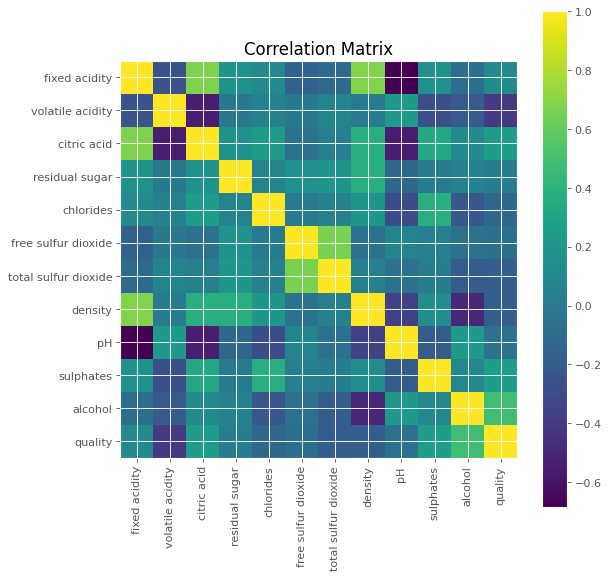

In [ ]:
def plotCorrelationMatrix(df, graphWidth):
    numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
    corr = numeric_df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 8)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int(np.ceil(nCol / nGraphPerRow))
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


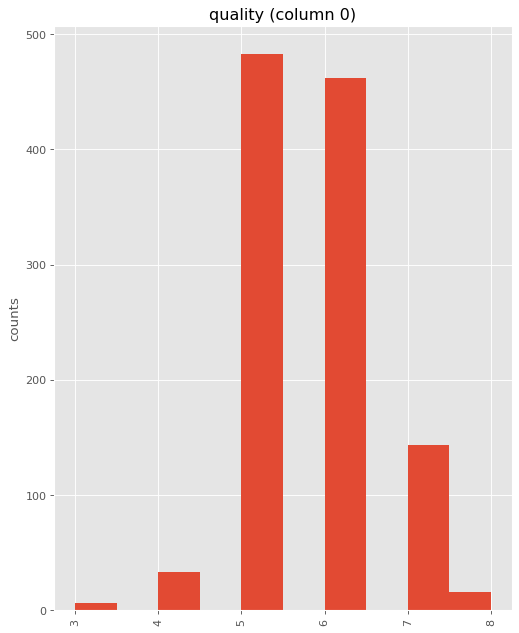

In [ ]:
plotPerColumnDistribution(df, 10, 5)

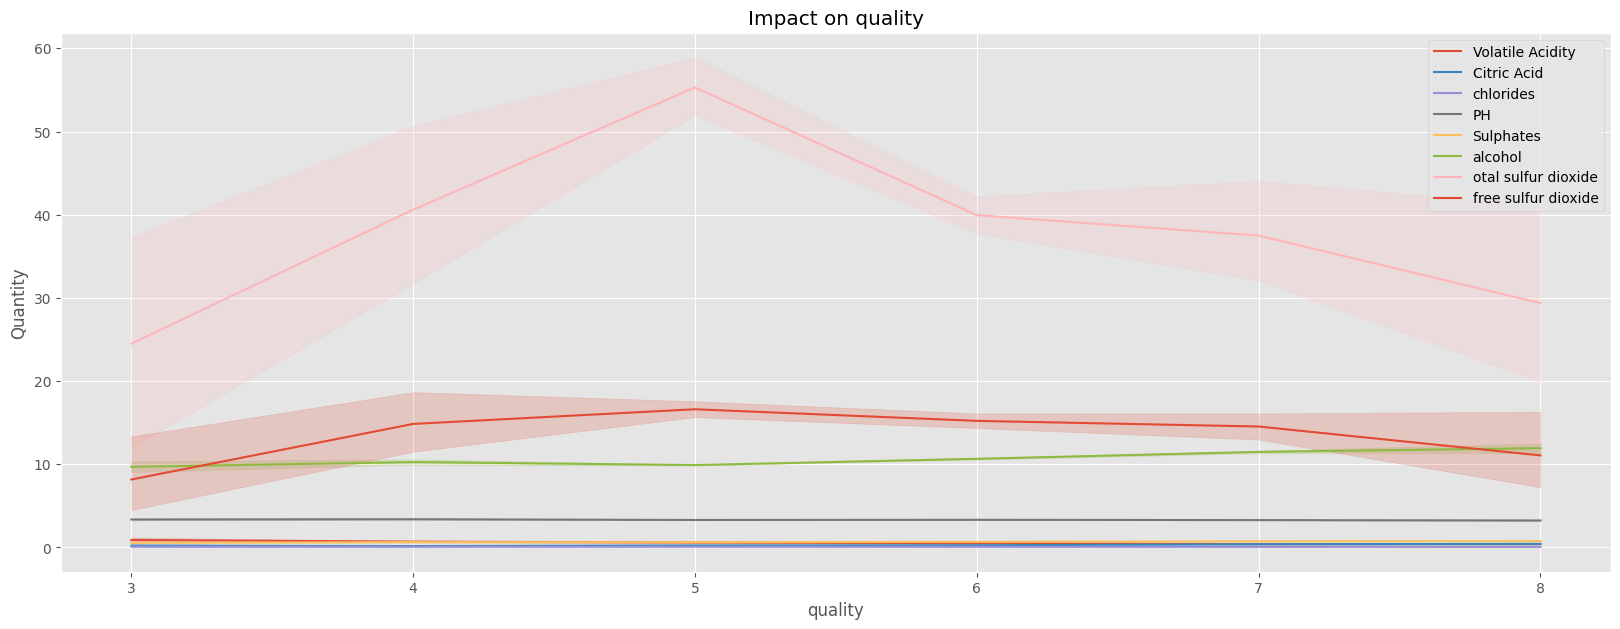

In [ ]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="chlorides",label="chlorides")
sns.lineplot(data=df, x="quality",y="pH",label="PH")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=df, x="quality",y="alcohol", label="alcohol")
sns.lineplot(data=df, x="quality",y="total sulfur dioxide", label="otal sulfur dioxide")
sns.lineplot(data=df, x="quality",y="free sulfur dioxide", label="free sulfur dioxide")
plt.ylabel("Quantity")
plt.title("Impact on quality")
plt.legend()
plt.show()

<Axes: xlabel='quality', ylabel='alcohol'>

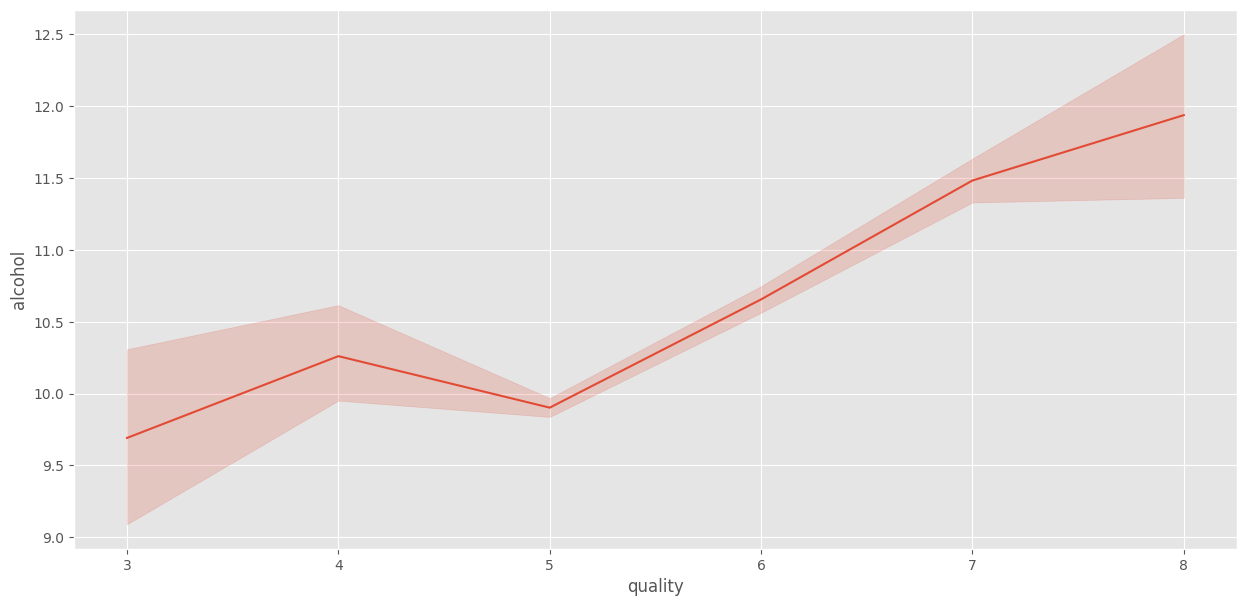

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="alcohol")

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

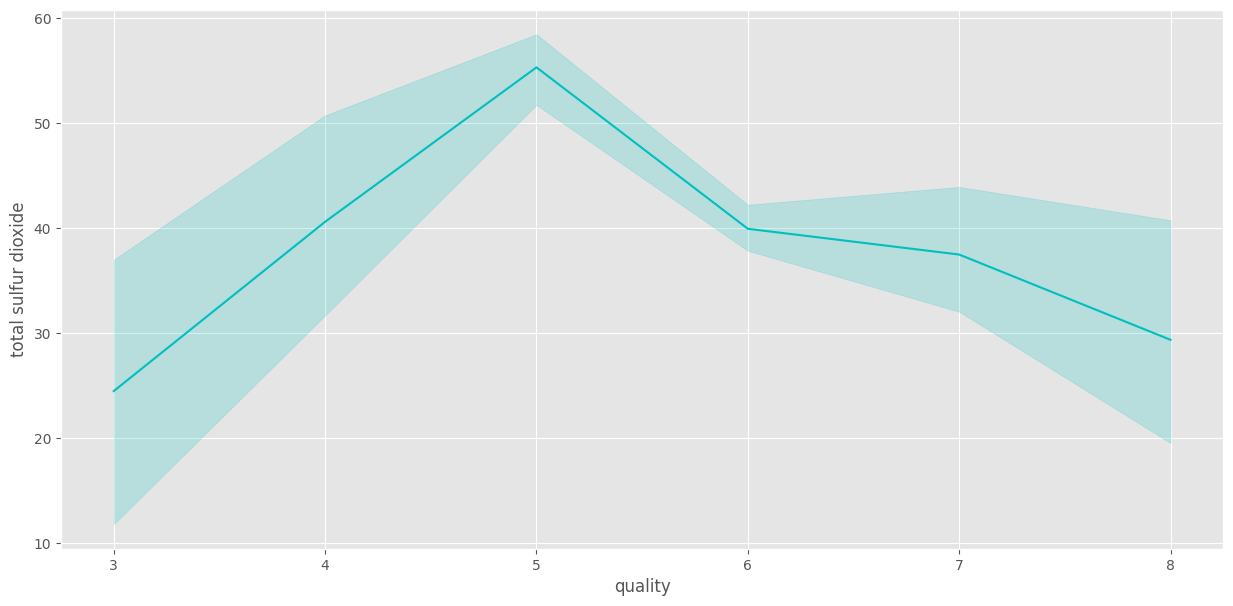

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",color="c")

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

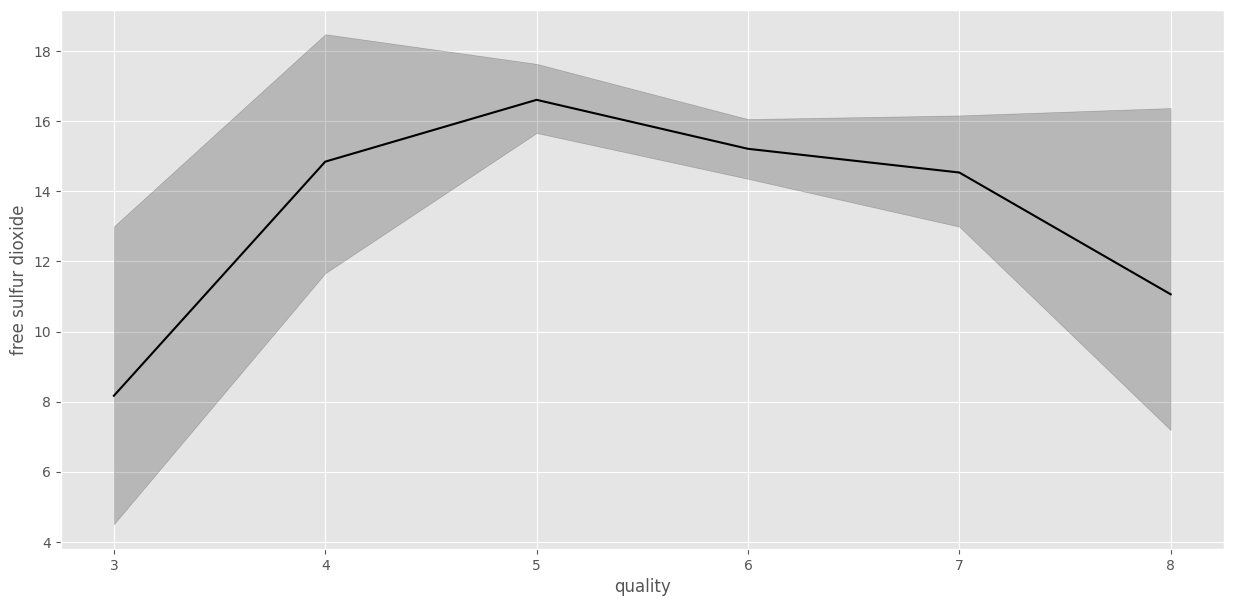

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",color="black")

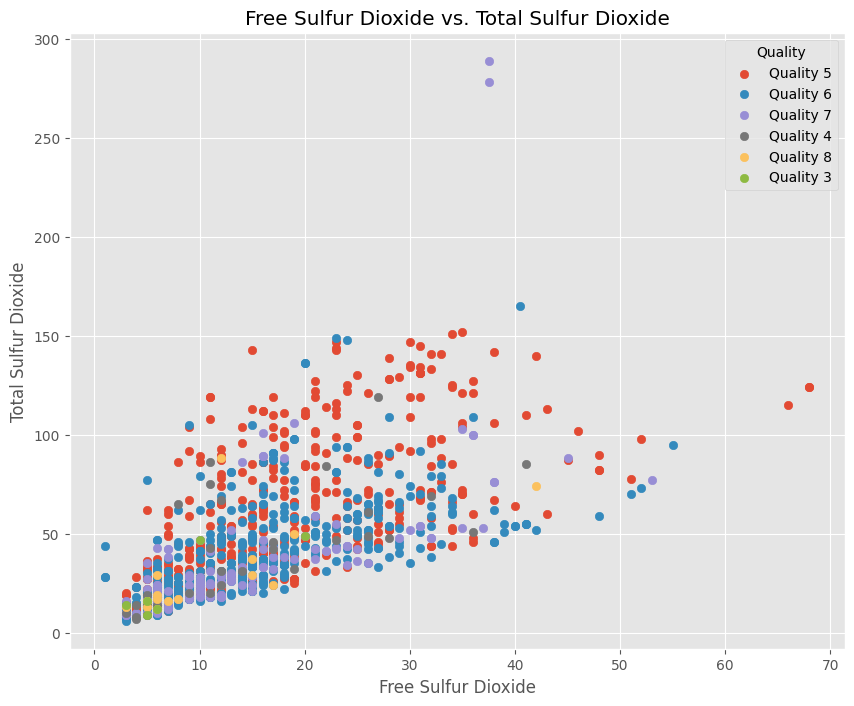

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

quality_values = df['quality'].unique()

for quality in quality_values:
    plt.scatter(df[df['quality'] == quality]['free sulfur dioxide'],
                df[df['quality'] == quality]['total sulfur dioxide'],
                label=f'Quality {quality}')

plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.title('Free Sulfur Dioxide vs. Total Sulfur Dioxide')
plt.legend(title='Quality', loc='upper right')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score,r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
X = df.drop(columns="quality")
y = df["quality"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (857, 11)
X Test  :  (286, 11)
Y Train :  (857,)
Y Test  :  (286,)


In [ ]:
LR_model=LinearRegression()

# fit model
LR_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", LR_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", LR_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_LR=LR_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Linear R : mean absolute error is ", mean_absolute_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : mean squared  error is " , mean_squared_error(y_test,y_pred_LR))
print(" Model Evaluation Linear R : median absolute error is " ,median_absolute_error(y_test,y_pred_LR))

Score the X-train with Y-train is :  0.3766893166865495
Score the X-test  with Y-test  is :  0.3487901433645896
 Model Evaluation Linear R : mean absolute error is  0.4742577332205526
 Model Evaluation Linear R : mean squared  error is  0.37215517566167367
 Model Evaluation Linear R : median absolute error is  0.3771988566534432


In [ ]:
Lo_model=LogisticRegression(solver='liblinear')

# fit model

Lo_model.fit(X_train,y_train)


# Score X and Y - test and train model Logistic Regression

print("Score the X-train with Y-train is : ", Lo_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Lo_model.score(X_test,y_test))

# Expected value Y using X test
y_pred_Lo=Lo_model.predict(X_test)

# Model Evaluation
print( " Model Evaluation Logistic R : mean absolute error is ", mean_absolute_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : mean squared  error is " , mean_squared_error(y_test,y_pred_Lo))
print(" Model Evaluation Logistic R : median absolute error is " ,median_absolute_error(y_test,y_pred_Lo))

print(" Model Evaluation Logistic R : accuracy score " , accuracy_score(y_test,y_pred_Lo))

Score the X-train with Y-train is :  0.5869311551925321
Score the X-test  with Y-test  is :  0.6258741258741258
 Model Evaluation Logistic R : mean absolute error is  0.4020979020979021
 Model Evaluation Logistic R : mean squared  error is  0.458041958041958
 Model Evaluation Logistic R : median absolute error is  0.0
 Model Evaluation Logistic R : accuracy score  0.6258741258741258


In [ ]:
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

# Score X and Y - test and train

print("Score the X-train with Y-train is : ", Tree_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", Tree_model.score(X_test,y_test))

Score the X-train with Y-train is :  0.9253208868144691
Score the X-test  with Y-test  is :  0.5314685314685315


In [ ]:
print("The Important columns \n",Tree_model.feature_importances_)

The Important columns 
 [0.06612563 0.11009637 0.0704962  0.07394913 0.09327463 0.06891819
 0.08810707 0.04611864 0.06285573 0.13198572 0.18807269]


In [ ]:
print("The classes ",Tree_model.classes_)

y_pred_T =Tree_model.predict(X_test)

print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_T))

The classes  [3 4 5 6 7 8]
 Model Evaluation Decision Tree : accuracy score  0.5314685314685315


In [ ]:
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.5950991831971996
Score the X-test  with Y-test  is :  0.6433566433566433
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


In [ ]:
svr_model=SVR(degree=1,coef0=1, tol=0.001, C=1.5,epsilon=0.001)

# fit model
svr_model.fit(X_train,y_train)

y_pred_svr =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svr_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", svr_model.score(X_test,y_test))
print(" Model Evaluation Decision Tree : accuracy score " , accuracy_score(y_test,y_pred_svr))

Score the X-train with Y-train is :  0.14069185408666396
Score the X-test  with Y-test  is :  0.23501709956140815
 Model Evaluation Decision Tree : accuracy score  0.6433566433566433


In [ ]:
K_model = KNeighborsClassifier(n_neighbors = 5)
K_model.fit(X_train, y_train)

y_pred_k = K_model.predict(X_test)

print("Score the X-train with Y-train is : ", K_model.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", K_model.score(X_test,y_test))
print(" Model Evaluation K Neighbors Classifier : accuracy score " , accuracy_score(y_test,y_pred_k))

Score the X-train with Y-train is :  0.6289381563593932
Score the X-test  with Y-test  is :  0.5314685314685315
 Model Evaluation K Neighbors Classifier : accuracy score  0.5314685314685315


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score


extra_trees_classifier = ExtraTreesClassifier(n_estimators=200,random_state=42)
extra_trees_classifier.fit(X_train, y_train)

y_extra_trees = extra_trees_classifier.predict(X_test)

accuracy_extra_trees = accuracy_score(y_test, y_extra_trees)

print("Score the X-train with Y-train is : ", extra_trees_classifier.score(X_train,y_train))
print("Score the X-test  with Y-test  is : ", extra_trees_classifier.score(X_test,y_test))
print("Model Evaluation CatBoost Classifier : accuracy score " , accuracy_extra_trees)

Score the X-train with Y-train is :  1.0
Score the X-test  with Y-test  is :  0.6853146853146853
Model Evaluation CatBoost Classifier : accuracy score  0.6853146853146853
